<h1 style='color:white'>TP Integrador - CaC Big Data</h1>
<center><img src ='/work/img/portada.png'></center>

Trabajo realizado por Ma. Soledad García Ortiz para Big Data - CaC 4.0. 2022. Profesora: Regina Molares. 

In [ ]:
# A veces necesitamos instalar nuevas librerías en nuestros proyectos 
#(para q el interprete de python de un paso al costado usamos "!" para instalar la libreria en el sistema operativo (las librerias se instalan en el sist. operativo")
!pip install openpyxl==3.0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 35.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# imports
import numpy as np
import pandas as pd
import sqlite3 as sql3 
import matplotlib.pyplot as plt
import seaborn as sns 


<h2>Paso 1: Alcances del proyecto y obtener datos</h2>
<h3>Alcances del proyecto</h3>
<p>En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, que nos ayudarán a responder a las preguntas: </p>
<ul>
<li>¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>¿Hay grandes variaciones en ventas a lo largo del mes?</li>
</ul>
<p>Para este proyecto utilizaremos herramientas de Pandas para análisis exploratorio, Numpy para el análisis de ciertas columnas y Matplotlib/Seaborn para visualización de resultados.</p>

<h3>Descripción y obtención de los datos</h3>
<h4>Fuentes de datos</h4>
<ul>
<li>articles.db: BD con datos de los artículos.</li>
<li>sellers.xlsx: datos de los vendedores.</li>
<li>orders.csv: registro de las ventas de un mes.</li>
</ul>

In [ ]:
# Levanto los datos en 3 diferentes dataframes

#ARTICULOS
conn = sql3.connect("/work/data/articles.db")
sql_query = pd.read_sql_query("SELECT * FROM articles", conn) #Pandas no necesita "cursor" porq tiene un metodo para levantar querys de sql
df_articles = pd.DataFrame(sql_query, columns=["article_id", "article_name", "unit_price"])
print(df_articles)

    article_id      article_name unit_price
0        20015        Smartphone     525.00
1        20016           Full Pc    2127.81
2        20017           Monitor     230.00
3        20018            Tablet     130.00
4        20019              Desk     130.10
5        20020             Chair     335.64
6        20021             Modem      67.50
7        20022    Range Extender      20.45
8        20023          Notebook    1000.00
9        20024           Netbook     145.00
10       20025               HDD      54.62
11       20026               SDD      22.00
12       20027        Ram Memory      35.95
13       20028       Motherboard     138.38
14       20029             Mouse      30.30
15       20030        Fan Cooler       4.25
16       20031            Webcam      20.07
17       20032          Keyboard      22.60
18       20033        Headphones      23.30
19       20034           Scanner     185.00
20       20035              Case      37.90
21       20036        Video Card

In [ ]:
#VENDEDORES
df_sellers = pd.read_excel("/work/data/sellers.xlsx", index_col=0)
print(df_sellers)

                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres
6           Milly Christoffe
7                 Kati Innot
8              Tobin Roselli
9               Onida Cosely
10           Cirilo Grandham
11           Vasily Danilyuk
12          Brockie Patience
13           Arnold Kilkenny
14            Janel O'Curran
15           Daisie Slograve


In [ ]:
#ORDENES
df_orders = pd.read_csv("/work/data/orders.csv")
print(df_orders)

     order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]


<h2>Paso 2: Explorar y preparar los datos</h2>
<h3>Exploración</h3>

In [ ]:
# Exploración del df de artículos
print("Muestra de datos")
print(df_articles.head())
print("\nFormato del dataframe")
print(df_articles.shape)
print("\nBusqueda de valores nulos")
print(df_articles.isnull().sum())
print("\nFormato de datos")
print(df_articles.dtypes)


Muestra de datos
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe
(31, 3)

Busqueda de valores nulos
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de datos
article_id       int64
article_name    object
unit_price      object
dtype: object


In [ ]:
# Exploración del df de vendedores
print("Muestra de datos")
print(df_sellers.head())
print("\nFormato del dataframe")
print(df_sellers.shape)
print("\nBusqueda de valores nulos")
print(df_sellers.isnull().sum())
print("\nFormato de datos")
print(df_sellers.dtypes)

Muestra de datos
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Formato del dataframe
(15, 1)

Busqueda de valores nulos
seller_name    0
dtype: int64

Formato de datos
seller_name    object
dtype: object


In [ ]:
# Exploración del df de órdenes
print("Muestra de datos")
print(df_orders.head())
print("\nFormato del dataframe")
print(df_orders.shape)
print("\nBusqueda de valores nulos")
print(df_orders.isnull().sum())
print("\nFormato de datos")
print(df_orders.dtypes)

Muestra de datos
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe
(1000, 6)

Busqueda de valores nulos
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de datos
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h3>Preparación</h3>
<p>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</p>

In [ ]:
df_articles["unit_price"] = df_articles ["unit_price"].astype(float)
print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


<h2>Paso 3: Definir el modelo de datos</h2>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>
<img src='/work/img/modelo.png'>


<h2>Paso 4: Correr los pipelines para modelar los datos</h2>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

In [ ]:
#Creo una copia del df_orders
my_df = df_orders.copy()

#cambio el indice del df_artícles
#df_articles.set_index("article_id", inplace=True)
print(df_articles.head())
#print(df_articles.loc[20017]["article_name"])

           article_name  unit_price
article_id                         
20015        Smartphone      525.00
20016           Full Pc     2127.81
20017           Monitor      230.00
20018            Tablet      130.00
20019              Desk      130.10


In [ ]:
#print(my_df.head())
print(my_df)

     week  quantity country_name   article_name  total_amount      seller_name
0       1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1       1        15         Peru          Mouse         454.5      Ewell Peres
2       1         5      Bolivia        Netbook         725.0   Janel O'Curran
3       1         9       Brazil         Tablet        1170.0   Janel O'Curran
4       1         6       Mexico           Case         227.4  Daisie Slograve
..    ...       ...          ...            ...           ...              ...
995     4         1       Brazil          Modem          67.5       Kati Innot
996     4        15       Brazil       Heatsink         150.0  Daisie Slograve
997     4         2     Colombia       Heatsink          20.0  Vasily Danilyuk
998     4        14       Brazil         Tablet        1820.0  Vasily Danilyuk
999     4        12       Brazil            SDD         264.0     Onida Cosely

[1000 rows x 6 columns]


In [ ]:
#agrego las columnas q me faltan
my_df = my_df.assign(article_name = my_df["article_id"])
my_df = my_df.assign(total_amount = my_df["article_id"])
my_df = my_df.assign(seller_name = my_df["seller_id"])
print(my_df.head())

   order_id  week  article_id  quantity  seller_id country_name  article_name  \
0     15024     1       20039        10         10         Peru         20039   
1     15025     1       20029        15          5         Peru         20029   
2     15026     1       20024         5         14      Bolivia         20024   
3     15027     1       20018         9         14       Brazil         20018   
4     15028     1       20035         6         15       Mexico         20035   

   total_amount  seller_name  
0         20039           10  
1         20029            5  
2         20024           14  
3         20018           14  
4         20035           15  


In [ ]:
#Reemplazar los datos en las nuevas columnas
#print(my_df.index)
for i in range(len(my_df.index)):

    #columna article_name
    #cargo el nombre del articulo en una variable
    #article = df_articles.loc[my_df.loc[i]['article_name']]['article_name']
    #se lo asigno a la columna y registro que corresponde
    #my_df.loc[i,"article_name"] = article

    # columna total amount
    #my_df.loc[i, 'total_amount'] = my_df.loc[i, 'quantity'] * df_articles.loc[my_df.loc[i]['total_amount']]['unit_price']

    #columna de seller_name
    #my_df.loc[i,"seller_name"] = df_sellers.loc[my_df.loc[i]["seller_name"]]["seller_name"]

print(my_df.head())



   order_id  week  article_id  quantity  seller_id country_name  \
0     15024     1       20039        10         10         Peru   
1     15025     1       20029        15          5         Peru   
2     15026     1       20024         5         14      Bolivia   
3     15027     1       20018         9         14       Brazil   
4     15028     1       20035         6         15       Mexico   

    article_name  total_amount      seller_name  
0  Water Cooling         675.0  Cirilo Grandham  
1          Mouse         454.5      Ewell Peres  
2        Netbook         725.0   Janel O'Curran  
3         Tablet        1170.0   Janel O'Curran  
4           Case         227.4  Daisie Slograve  


In [ ]:
#elimino las columnas que no necesito
#my_df.drop(['order_id','article_id','seller_id'], axis='columns', inplace=True)
print(my_df.head())
print(my_df.shape)

   week  quantity country_name   article_name  total_amount      seller_name
0     1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1     1        15         Peru          Mouse         454.5      Ewell Peres
2     1         5      Bolivia        Netbook         725.0   Janel O'Curran
3     1         9       Brazil         Tablet        1170.0   Janel O'Curran
4     1         6       Mexico           Case         227.4  Daisie Slograve
(1000, 6)


<h2>Paso 5: Responder las preguntas</h2>


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df2= my_df.groupby("article_name").sum()
por_cant = my_df2.sort_values("quantity", ascending=False)
print(por_cant["quantity"].head(1))

article_name
HDD    413
Name: quantity, dtype: int64


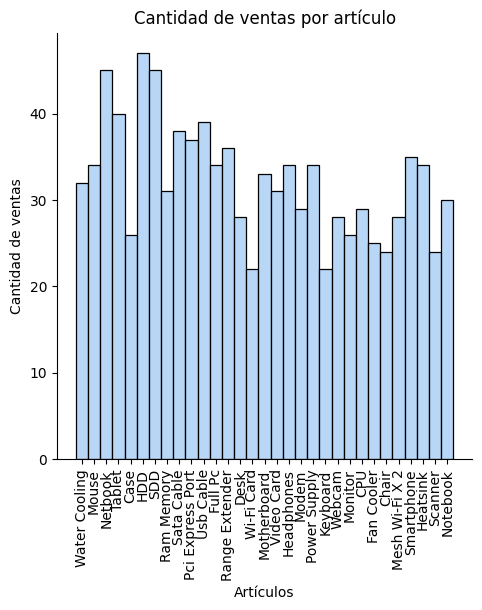

In [ ]:
# RESOLUCIÓN GRÁFICA
sns.displot(my_df, x="article_name")
plt.xticks(rotation=90)
plt.title("Cantidad de ventas por artículo")
plt.xlabel("Artículos")
plt.ylabel("Cantidad de ventas")
sns.color_palette("rocket")
plt.show()

<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
my_df3= (my_df.groupby("article_name").sum()).sort_values("total_amount", ascending=False). head(5)
print(my_df3["total_amount"])

article_name
Full Pc       538335.93
Notebook      251000.00
Smartphone    152250.00
Chair          69477.48
Tablet         48620.00
Name: total_amount, dtype: float64


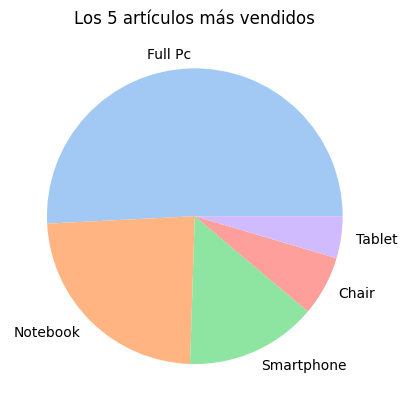

In [ ]:
# RESOLUCIÓN GRÁFICA 
plt.pie(x=my_df3["total_amount"], labels=my_df3.index)
plt.title("Los 5 artículos más vendidos")
plt.show()

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
df4= (my_df.groupby("seller_name").sum()).sort_values("total_amount", ascending=False)
print(df4[["quantity"]+["total_amount"]])

                   quantity  total_amount
seller_name                              
Janel O'Curran          703     192832.47
Brockie Patience        441     142709.88
Oliviero Charkham       555     141329.76
Vasily Danilyuk         521     129157.55
Daisie Slograve         554     120520.11
Aveline Swanwick        629     118874.33
Arnold Kilkenny         583      94552.04
Kati Innot              512      83704.62
Jase Doy                582      80628.31
Ewell Peres             496      78144.32
Onida Cosely            535      77373.37
Milly Christoffe        442      61733.69
Tobin Roselli           519      56984.42
Cornie Wynrehame        523      52253.57
Cirilo Grandham         470      45009.40


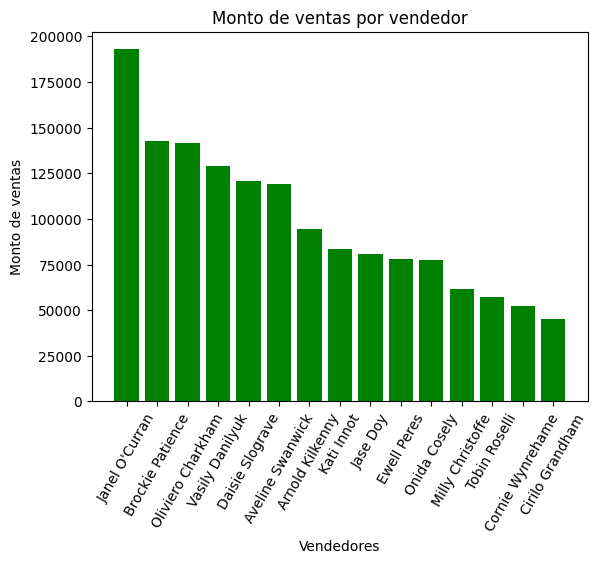

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.bar(df4.index, df4["total_amount"], color=["green"])
plt.title("Monto de ventas por vendedor")
plt.xticks(rotation=60)
plt.xlabel("Vendedores")
plt.ylabel("Monto de ventas")
plt.show()

<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>


In [ ]:
# RESOLUCIÓN ANALÍTICA
df5=(my_df.groupby("week").sum()).sort_values("total_amount", ascending=False)
print(df5)

      quantity  total_amount
week                        
1         2449     507458.81
2         2444     415364.44
3         2114     329140.03
4         1058     223844.56


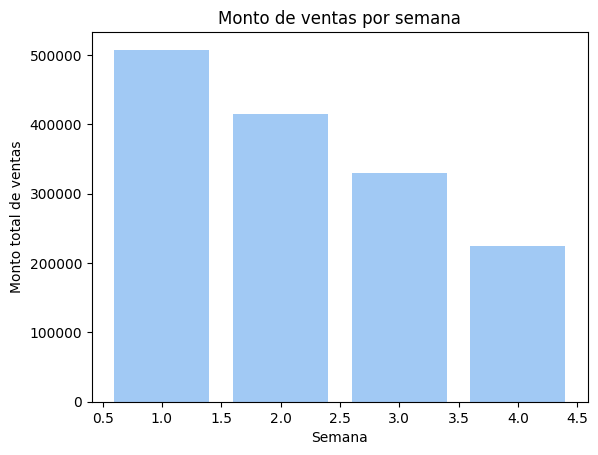

In [ ]:
# RESOLUCIÓN GRÁFICA
plt.bar(df5.index,df5["total_amount"])
plt.title("Monto de ventas por semana")
plt.xlabel("Semana")
plt.ylabel("Monto total de ventas")
plt.show()

<h2>Tareas a realizar</h2>
<ul>
<li>Pensar 3 preguntas y responderlas con el método que consideres más apropiado. Al menos una de ellas debe contener la columna 'country_name' y al menos una de ellas debe buscar correlación entre dos variables categóricas.</li>
<li>Personalizar, estilar y dar contexto a las gráficas.</li>
<li>Generar un informe en el que se responda en forma coloquial a las preguntas, agregando conclusiones y consejos que puedan surgir de este trabajo. Se pueden agregar imágenes.</li>
<li>Publicar el trabajo y concretar la entrega en <a href="https://docs.google.com/forms/d/e/1FAIpQLSdiu_l6aO4tKBLiojZJp-RLF--deRAW0VM-0eqQ9tHJSD-j7A/viewform">https://docs.google.com/forms/d/e/1FAIpQLSdiu_l6aO4tKBLiojZJp-RLF--deRAW0VM-0eqQ9tHJSD-j7A/viewform</a>. <br>Deberás proporcionar link al notebook fuente y a la publicación. <br>Video/guía de cómo entregar el trabajo: <a href="https://youtu.be/FCQRhs4dxls">https://youtu.be/FCQRhs4dxls</a></li>
<li>Entregas:  4 de julio hasta 15 de julio, 2022 - 23:59 hs</li>
</ul>

<h3>5. ¿Cuáles fueron los 5 países que mas HDD vendieron?</h3>


In [ ]:
# RESOLUCIÓN ANALITICA 
df9= my_df[my_df["article_name"]== "HDD"]
df10 = (df9.groupby("country_name").sum()).sort_values("quantity", ascending=False). head(5)

print(df10["quantity"])



country_name
Brazil       119
Argentina     68
Mexico        63
Peru          56
Colombia      34
Name: quantity, dtype: int64


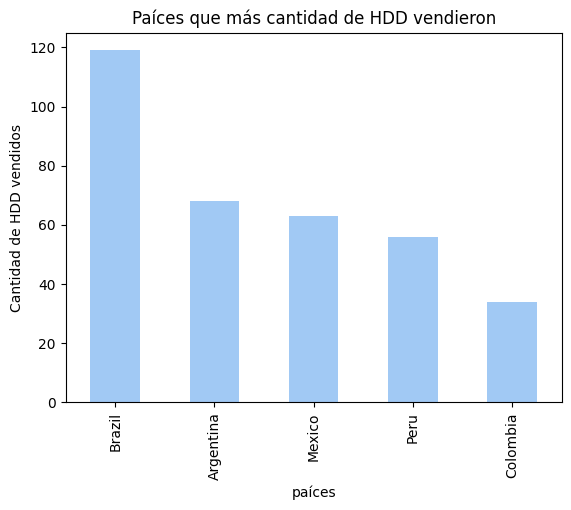

In [ ]:
#RESOLUCIÓN GRÁFICA
df10["quantity"].plot(kind="bar")
plt.title("Paíces que más cantidad de HDD vendieron")
plt.xlabel("paíces")
plt.ylabel("Cantidad de HDD vendidos")
plt.show()

<h3>6. ¿Cuáles son los 5 productos que más se vendieron en Argentina?</h3>

In [ ]:
# RESOLUCIÓN ANALÍTICA
df7 = my_df[my_df["country_name"]== "Argentina"]
df7= df7[["article_name", "quantity"]]

df8= (df7.groupby("article_name").sum()).sort_values("quantity", ascending=False). head(5)
print(df8)






                quantity
article_name            
CPU                  104
SDD                   73
HDD                   68
Range Extender        58
Fan Cooler            47


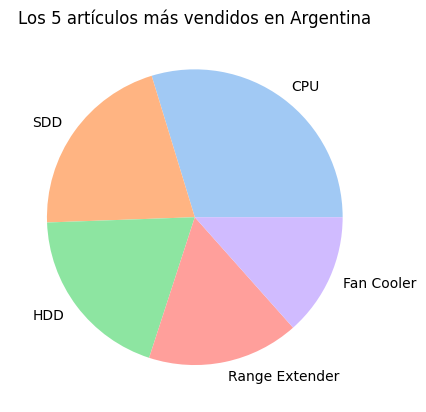

In [ ]:
#RESOLUCIÓN GRAFICA
plt.pie(x=df8["quantity"], labels=df8.index)
plt.title("Los 5 artículos más vendidos en Argentina")
plt.show()

<h3>7a. ¿Cuál fue el país que menos productos vendio? </h3>

In [ ]:
# RESOLUCIÓN ANALITICA
df6= (my_df.groupby("country_name").sum()).sort_values("quantity", ascending=False)

print(df6.tail(1))

              week  quantity  total_amount
country_name                              
Puerto Rico      3        12       1265.43


<h3>7b. ¿Qué productos se vendieron en Puerto Rico? </h3>

In [ ]:
#RESOLUCION ANALITICA
df_pr = my_df[my_df["country_name"] == "Puerto Rico"]

print(df_pr.groupby("article_name").sum())



              week  quantity  total_amount
article_name                              
CPU              1         9       1256.58
Usb Cable        2         3          8.85


<h2>Conclusiones y propuestas</h2>

<li>El artículo más vendido fue HDD</li>
<li>El artículo que más ingresos proporcionó fue el Full Pc, proporcionando  $538335.93 </li>
<li>Los 5 artículos más vendidos fueron: Full Pc, Notebook, Smartphone, Chair y Tablet</li>
<li>El mejor vendedor del mes a nivel mundial fue Janel O'Curran con un total de ventas de $192832.47</li>
<li>Las cantidad de ventas es mayor a principio de mes y decrece hasta fin de mes por lo que sería importante realizar promociones en las dos últimas semanas de cada mes. </li>
<li>Los paíces que más vendieron HDD fueron Brazil, Argentina, México, Perú y Colombia coincidiendo con los paíces que obtienen mejores ventas</li>
<li>Los productos que más se vendieron en Argentina fueron CPU, SDD, HDD, Range Extende y Fan Cooler </li>
<li>El país que menos productos vendio fue Puerto Rico, lo cual indica que se deberá limitar el envío de productos a dicha sucursal priorizando los más vendidos (CPU y Cable USB)</li>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d69211b5-c9d6-48c9-9bbc-cd5372e9b622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>